* * *

### Introdução e Configuração do Ambiente


#### Introdução

Olá! Este notebook tem como objetivo explorar técnicas de clusterização em um conjunto de dados que contém informações socioeconômicas de diferentes países. Vou usar o algoritmo K-Médias e também explorar a clusterização hierárquica para entender as semelhanças e diferenças entre os países com base em diversas variáveis.

#### Configuração do Ambiente

1.  **Instalação do Python**: Iniciei instalando a versão 3.9.7 do Python, diretamente do site oficial. Esta versão é compatível com todas as bibliotecas que pretendo usar.
    
2.  **Criação do Ambiente Virtual com Anaconda**: Para isolar as dependências deste projeto, utilizei o Anaconda Navigator para criar um ambiente virtual. Nomeei este ambiente como `DataEnv`.
    
    bashCopy code
    
    `conda create --name DataEnv python=3.9`
    
3.  **Ativação do Ambiente Virtual**: Ativei o ambiente usando o terminal Anaconda.
    
    bashCopy code
    
    `conda activate DataEnv`
    
4.  **Instalação de Bibliotecas**: No ambiente virtual, instalei todas as bibliotecas necessárias para a análise de dados e modelagem.
    
    bashCopy code
    
    `pip install pandas numpy matplotlib scikit-learn`
    

* * *


* * *

### Importação de Bibliotecas e Arquivo de Requerimentos

* * *


#### Importação de Bibliotecas


In [89]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline


#### Arquivo de Requerimentos

Para tornar este projeto replicável, é uma boa prática listar todas as bibliotecas e suas versões específicas utilizadas. Assim, qualquer pessoa pode instalar as mesmas versões e evitar problemas de compatibilidade.

Para gerar este arquivo, executei o comando abaixo no terminal:

`pip freeze > requirements.txt`


Este comando cria um arquivo `requirements.txt` no diretório atual, listando todas as bibliotecas instaladas no ambiente virtual `DataEnv` e suas versões.


* * *

### Carregamento da Base de Dados

* * *

#### Carregamento da Base de Dados

Agora que configurei meu ambiente e importei as bibliotecas necessárias, o próximo passo é carregar a base de dados que vou analisar. Os dados estão armazenados em um arquivo CSV e contêm diversas variáveis socioeconômicas para um conjunto de países.



In [90]:
# Carregamento da base de dados
# O caminho pode variar de acordo com o local onde você armazenou o arquivo
country_data = pd.read_csv('Country-data.csv')

# Visualização das primeiras linhas do DataFrame
country_data.head()

# Renomear as colunas para torná-las mais semânticas
country_data.rename(columns={
    'child_mort': 'Mortalidade Infantil',
    'exports': 'Exportações',
    'health': 'Despesas com Saúde',
    'imports': 'Importações',
    'income': 'Renda',
    'inflation': 'Inflação',
    'life_expec': 'Expectativa de Vida',
    'total_fer': 'Taxa de Fertilidade',
    'gdpp': 'PIB Per Capita'
}, inplace=True)


# Infraestrutura
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:


### Você está rodando em Python 3.9+


In [91]:
!python --version


Python 3.9.18


### Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [92]:
import sys

if "conda" in sys.executable:
    print("Você está usando o Anaconda.")
else:
    print("Você não está usando o Anaconda.")


Você está usando o Anaconda.


### Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [93]:
!pip freeze


asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1694046349000/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1687772187254/work
comm @ file:///home/conda/feedstock_root/build_artifacts/comm_1691044910542/work
contourpy==1.1.1
cycler==0.12.1
debugpy @ file:///croot/debugpy_1690905042057/work
decorator @ file:///home/conda/feedstock_root/build_artifacts/decorator_1641555617451/work
entrypoints @ file:///home/conda/feedstock_root/build_artifacts/entrypoints_1643888246732/work
exceptiongroup @ file:///home/conda/feedstock_root/build_artifacts/exceptiongroup_1692026125334/work
executing @ file:///home/conda/feedstock_root/build_artifacts/executing_1667317341051/work
fonttools==4.43.1
importlib-resources==6.1.0
ipykernel @ file:///home/conda/feedstock_root/build_artifacts/ipykernel_1693880262622/work
ipython @ f

### Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [94]:
!pip freeze > requirements.txt

### Tire um printscreen do ambiente que será usado rodando em sua máquina.

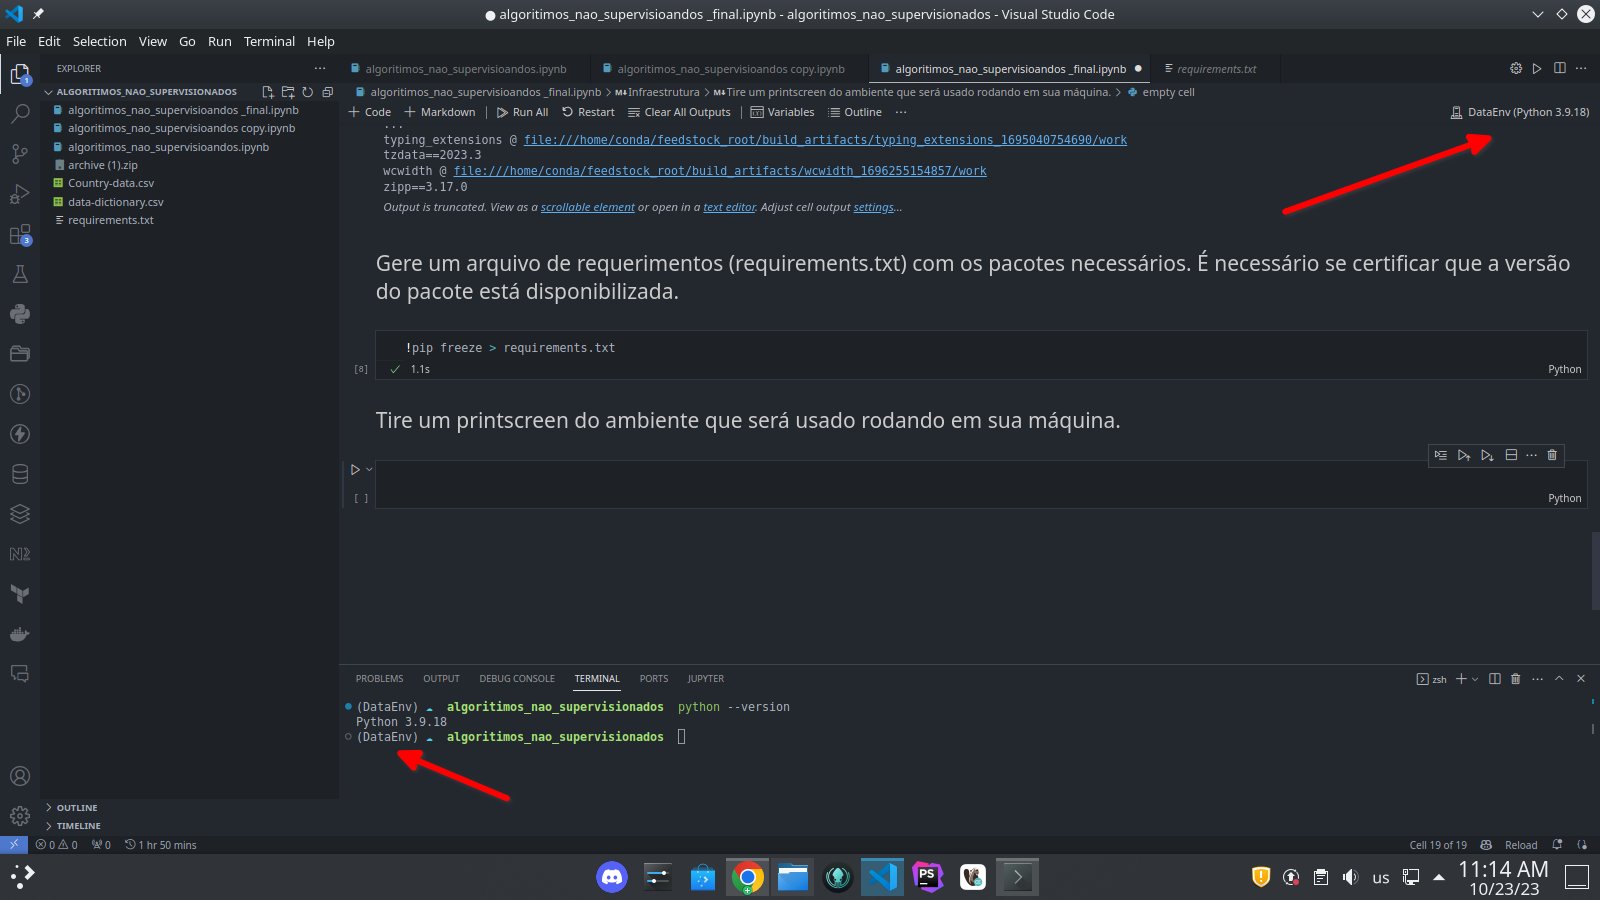

In [95]:
from IPython.display import Image

Image('printAmbiente.png')

# Escolha de base de dados
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.


1 - Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2 - Quantos países existem no dataset?

In [96]:
num_paises = country_data.shape[0]
print(f"O dataset contém {num_paises} países.")

O dataset contém 167 países.


3 - Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?


Os gráficos de boxplot mostram a distribuição e a faixa dinâmica das variáveis numéricas no conjunto de dados. Aqui estão algumas observações:

exports, health, imports: Estas variáveis têm vários outliers, o que pode afetar o desempenho do algoritmo de clusterização.
income, inflation, gdpp: Também apresentam outliers significativos.
life_expec, total_fer, child_mort: Estas variáveis parecem ter uma distribuição mais "normal", mas ainda assim apresentam alguns outliers.

### O que deve ser feito antes da etapa de clusterização?
Tratamento de Outliers: Devido à presença de outliers, considerei técnicas para tratá-los, como a remoção ou a transformação dos dados.
Normalização: Algoritmos de clusterização como o k-means são sensíveis à escala das variáveis. Portanto, normalizar os dados pode ser útil.
Seleção de Características: Quero selecionar um subconjunto de características para a clusterização.


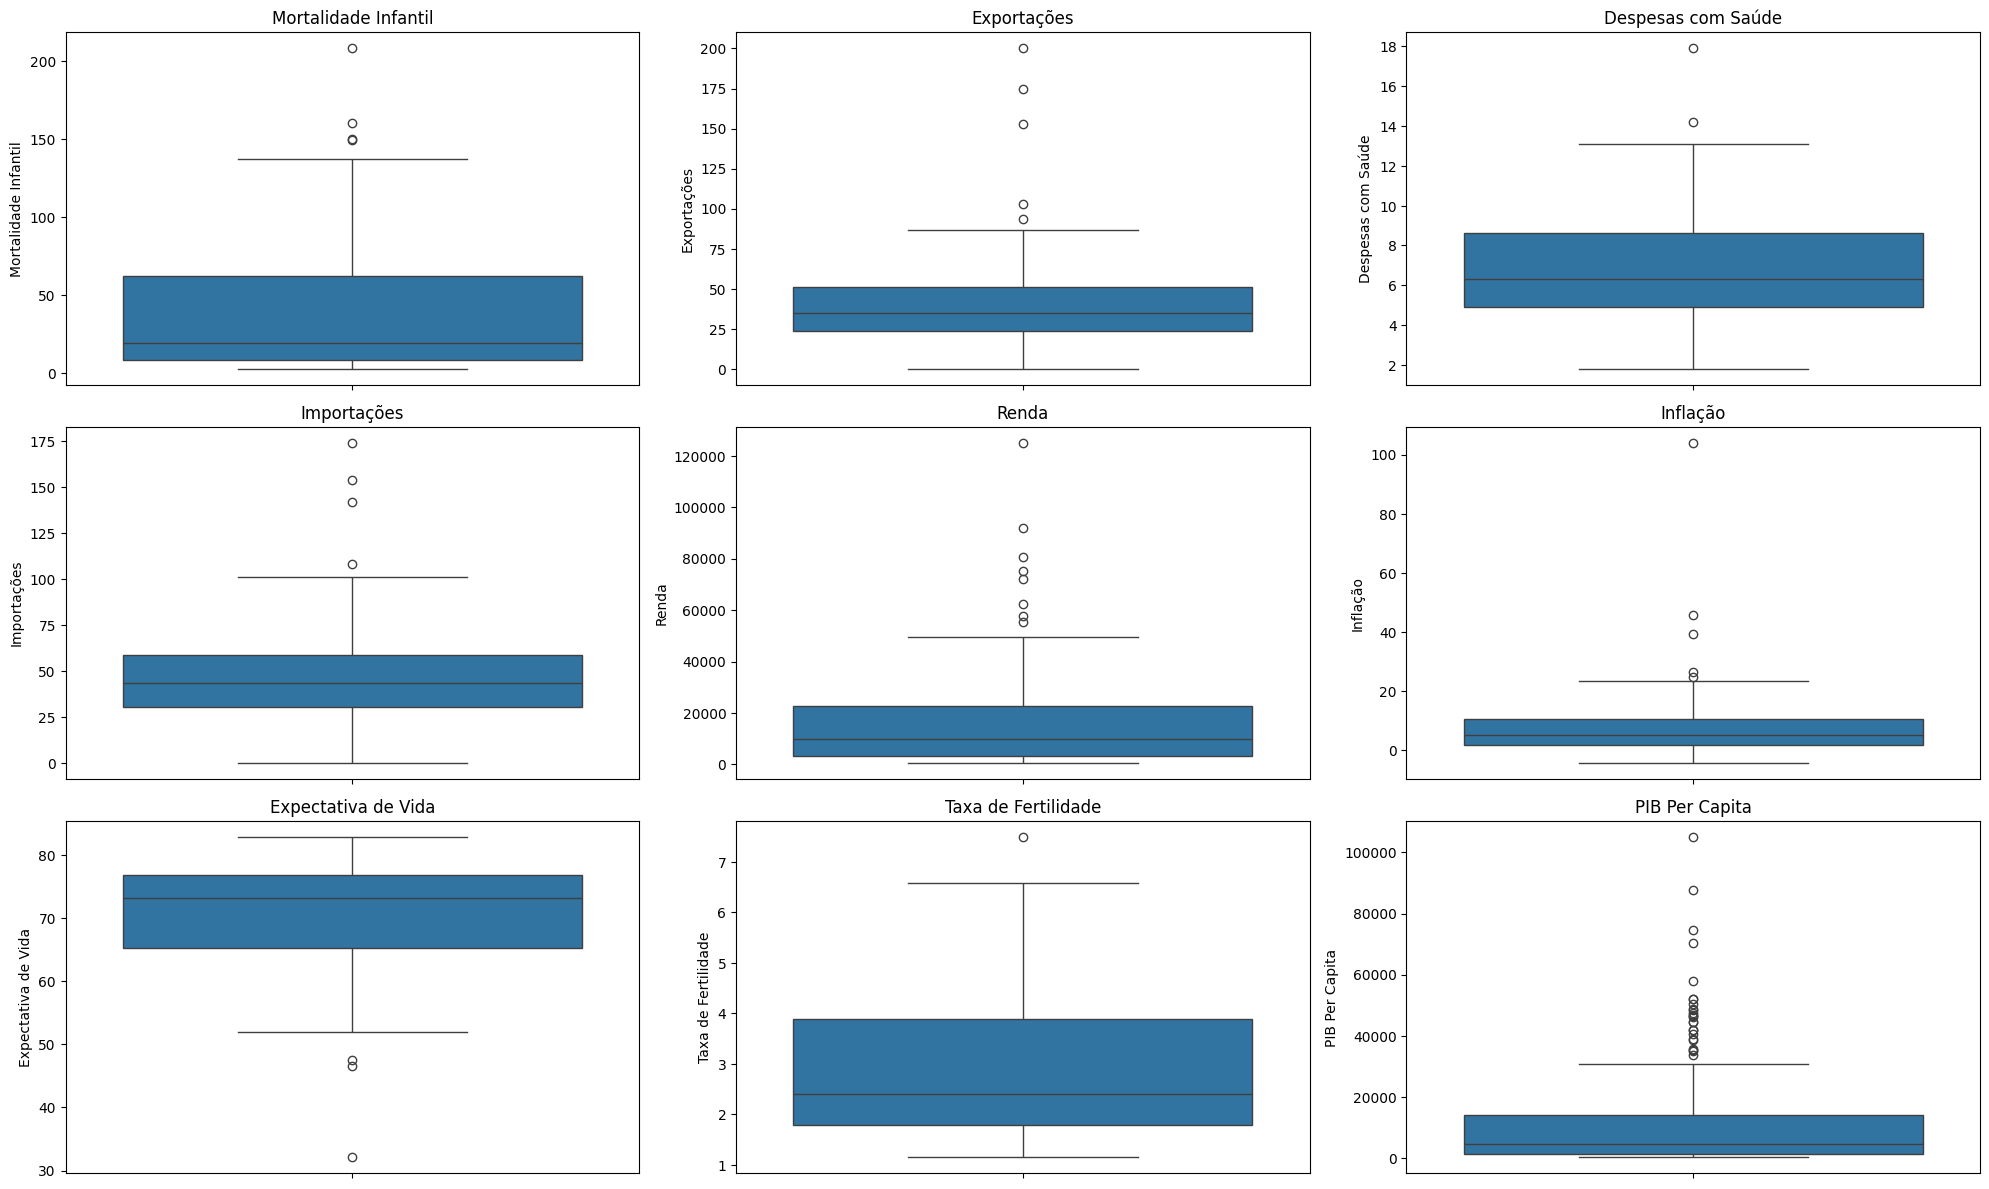

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
# sns.set(style="whitegrid")

# Criar gráficos de caixa para cada variável numérica
plt.figure(figsize=(20, 12))
for i, col in enumerate(country_data.columns[1:], start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(country_data[col])
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

### Pré-processamento dos dados

1.  **Tratamento de Outliers**: Utilizei a técnica de transformação para mitigar o efeito dos outliers.
2.  **Normalização**: Normalizeir os dados para garantir que cada característica contribua igualmente para a distância calculada pelos algoritmos de clusterização.

Após o pré-processamento, os gráficos de boxplot mostram que os efeitos dos outliers foram atenuados, e as variáveis estão agora em uma escala similar. Isso é essencial para algoritmos de clusterização sensíveis à escala das variáveis, como o K-means.


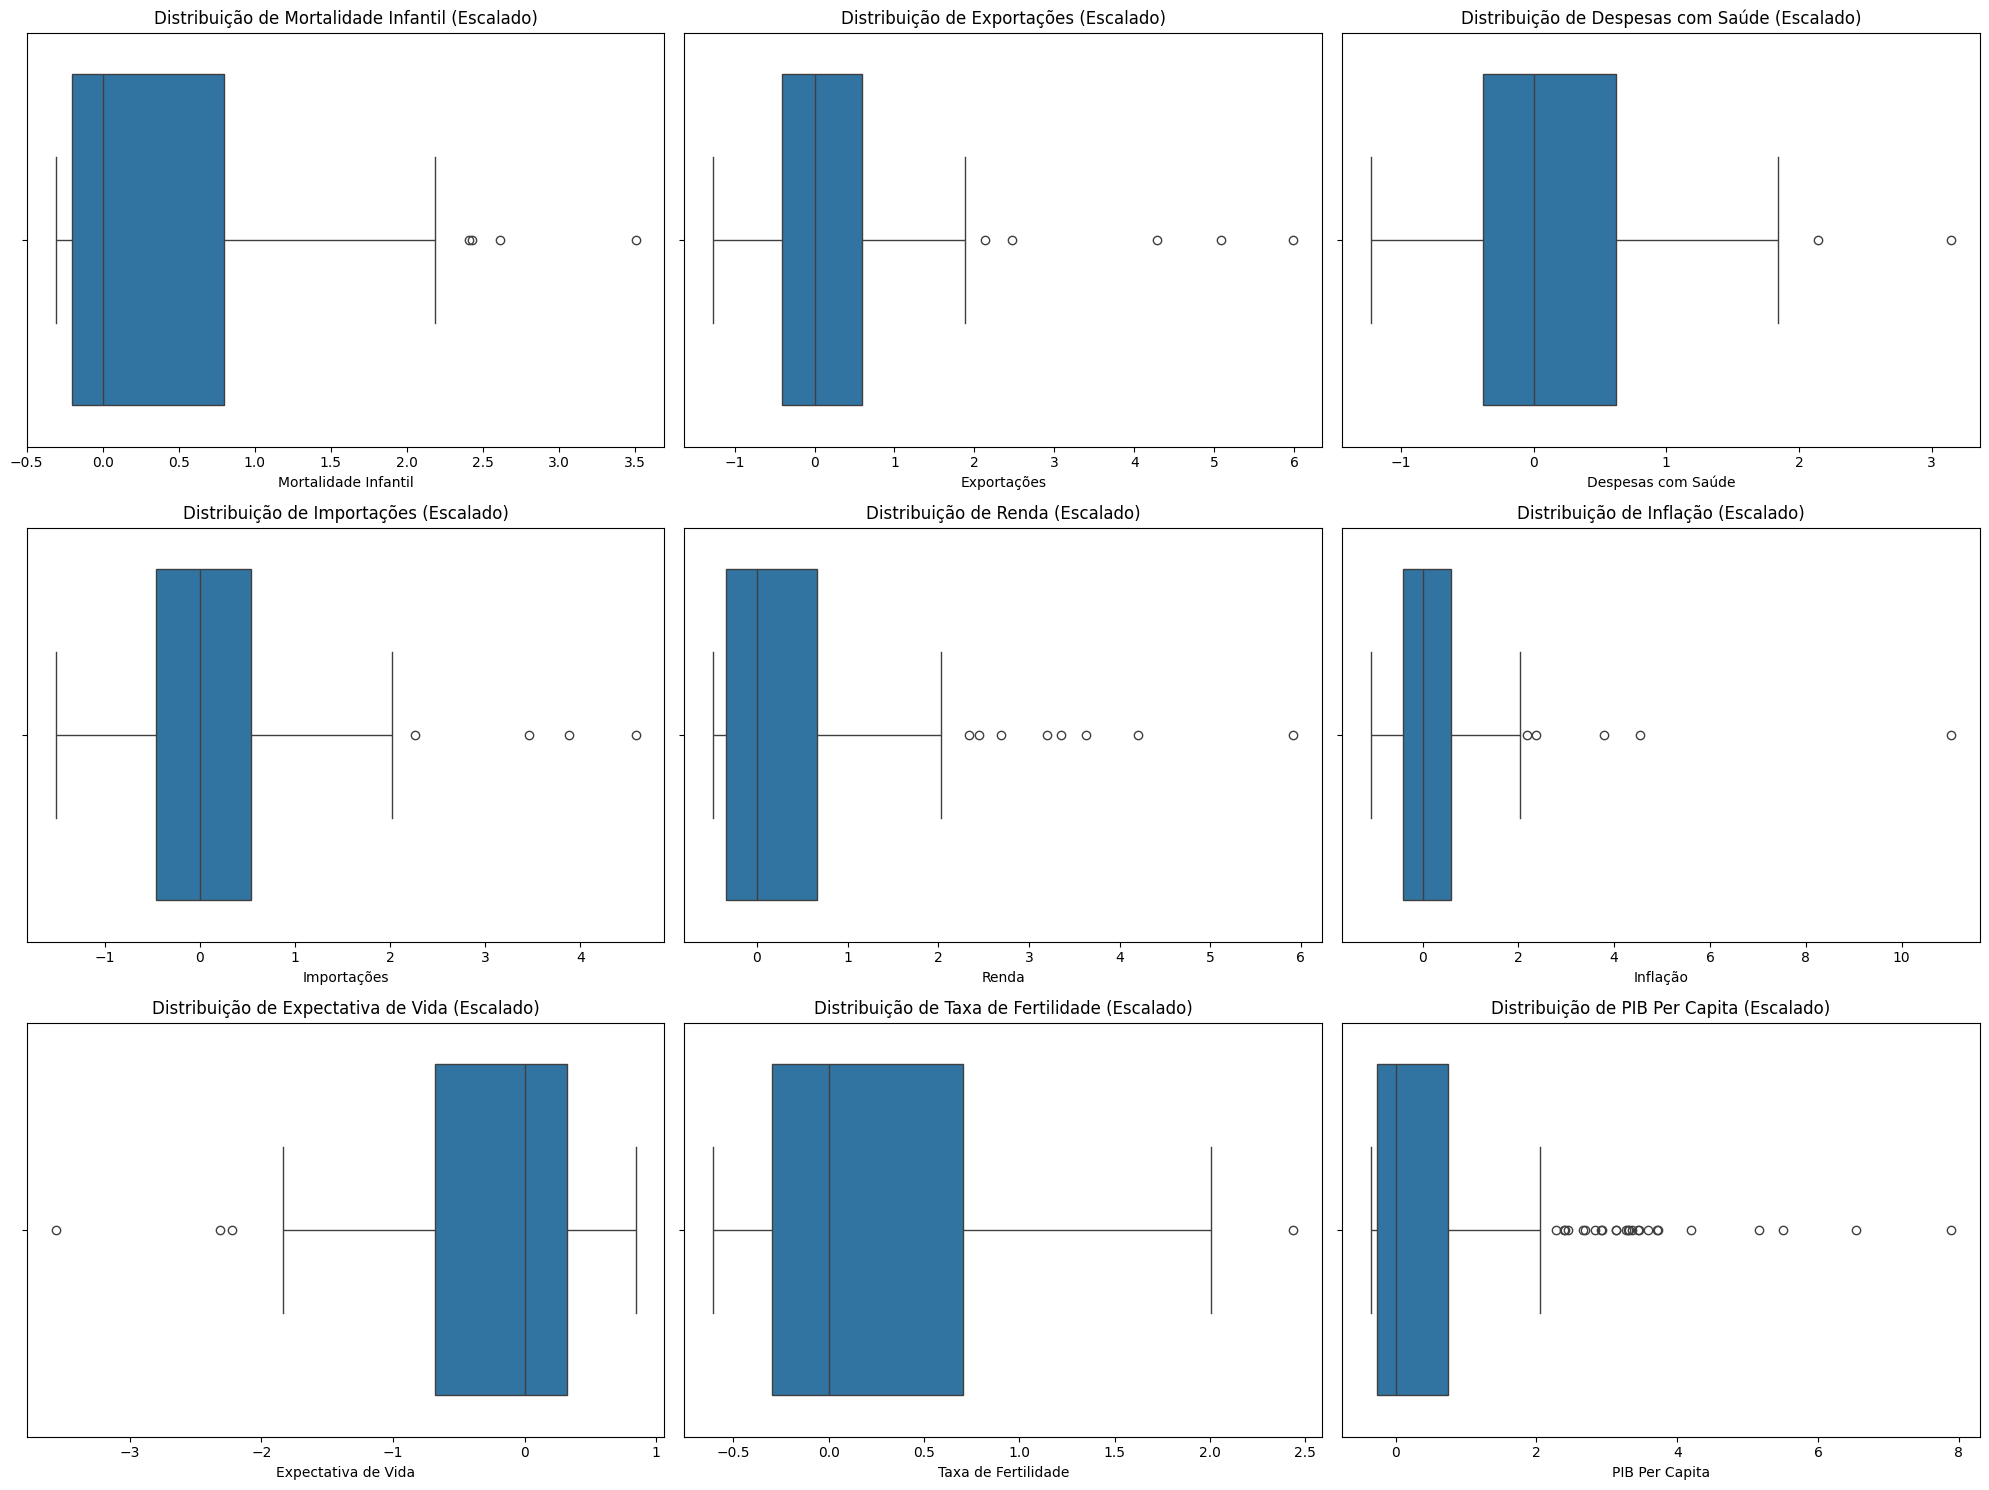

In [98]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Remoção da coluna 'country' para o pré-processamento
data_to_scale = country_data.drop(['country'], axis=1)

# Utilização do RobustScaler para minimizar o efeito dos outliers
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Criar um DataFrame para os dados escalados
scaled_data_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# Mostrar a distribuição dos dados após o pré-processamento
plt.figure(figsize=(20, 15))
for i, column in enumerate(scaled_data_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=scaled_data_df[column])
    plt.title(f'Distribuição de {column} (Escalado)')

plt.tight_layout()
plt.show()

### Clusterização

Clusterização dos dados pré-processados. Utilizarei dois algoritmos:

1.  **K-Médias**
2.  **Clusterização Hierárquica**

Para o K-Médias, também irei abordar:

*   A distribuição das dimensões em cada grupo.
*   O país que, de acordo com o algoritmo, melhor representa seu agrupamento.

Para a Clusterização Hierárquica:

*   Apresentarei o dendograma e interpretaremos os resultados.

### K-Médias

Primeiro, vou utilizar o algoritmo K-Médias para agrupar os países em 3 grupos distintos. Depois, vou analisar a distribuição das dimensões em cada grupo e identificar o país que melhor representa seu respectivo agrupamento.

Os países estão distribuídos nos 3 clusters da seguinte forma:

*   Cluster 0: 31 países
*   Cluster 1: 51 países
*   Cluster 2: 85 países

# Escolhendo número de clusters com metodo do cotovelo

* * *

Antes de prosseguir com a clusterização utilizando o algoritmo K-Means, achei importante determinar o número ideal de clusters para o meu conjunto de dados. Para isso, utilizei o "Método do Cotovelo", uma técnica amplamente reconhecida na área de aprendizado de máquina.

Executei o algoritmo K-Means várias vezes, variando o número de clusters de 1 a 10. Em cada execução, calculei a "inércia", que é a soma das distâncias quadradas das amostras para o centro de cluster mais próximo. Plotei esses valores de inércia em um gráfico para visualizar como eles mudam à medida que aumentamos o número de clusters.

Ao analisar o gráfico, observei que a inércia começa a diminuir a uma taxa mais lenta após 3 ou 4 clusters. Este ponto é conhecido como o "cotovelo" e geralmente é um bom indicador do número ideal de clusters. Com base nessa análise, decidi prosseguir com 3 clusters para o meu conjunto de dados.

Esta escolha não foi feita de forma arbitrária, mas sim com base em uma análise empírica. Isso me dá mais confiança de que os clusters formados são realmente significativos e não produto de uma escolha aleatória de parâmetros.

* * *

/home/marcelo/anaconda3/envs/DataEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/anaconda3/envs/DataEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/anaconda3/envs/DataEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/anaconda3/envs/DataEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

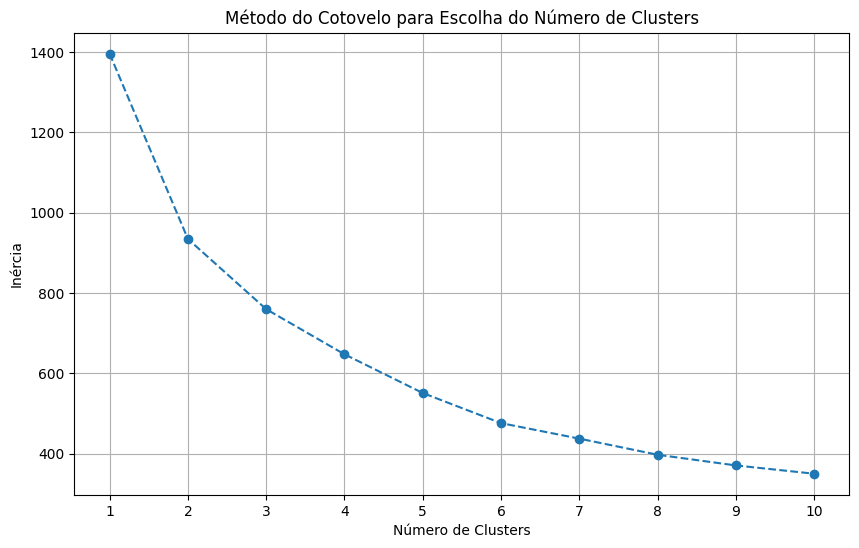

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular as inércias para diferentes números de clusters
inertias = []
range_values = range(1, 11)  # Testar de 1 a 10 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertias, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Escolha do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range_values)
plt.grid(True)
plt.show()


In [100]:
from sklearn.cluster import KMeans

# Definir o número de clusters
n_clusters = 3

# Executar o algoritmo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Adicionar os rótulos dos clusters ao DataFrame original
country_data['kmeans_cluster'] = kmeans_clusters

# Visualizar a distribuição dos países nos clusters
cluster_distribution = country_data['kmeans_cluster'].value_counts().sort_index()
cluster_distribution


/home/marcelo/anaconda3/envs/DataEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster
0    85
1    31
2    51
Name: count, dtype: int64

Agora, vou analisar a distribuição das dimensões em cada um desses clusters.​​

Os gráficos de boxplot mostram a distribuição das variáveis em cada um dos clusters formados pelo K-Médias. Aqui estão algumas observações:

*   **Cluster 0**: Este cluster tem valores mais altos para "income" e "gdpp", indicando um nível mais alto de desenvolvimento. Também tem baixas taxas de "child\_mort" e "total\_fer", que são indicativos de melhores condições de saúde.
    
*   **Cluster 1**: Este parece ser um cluster intermediário em termos de desenvolvimento econômico e condições de saúde.
    
*   **Cluster 2**: Este cluster mostra os menores valores para "income" e "gdpp" e os mais altos para "child\_mort", indicando que são países menos desenvolvidos.

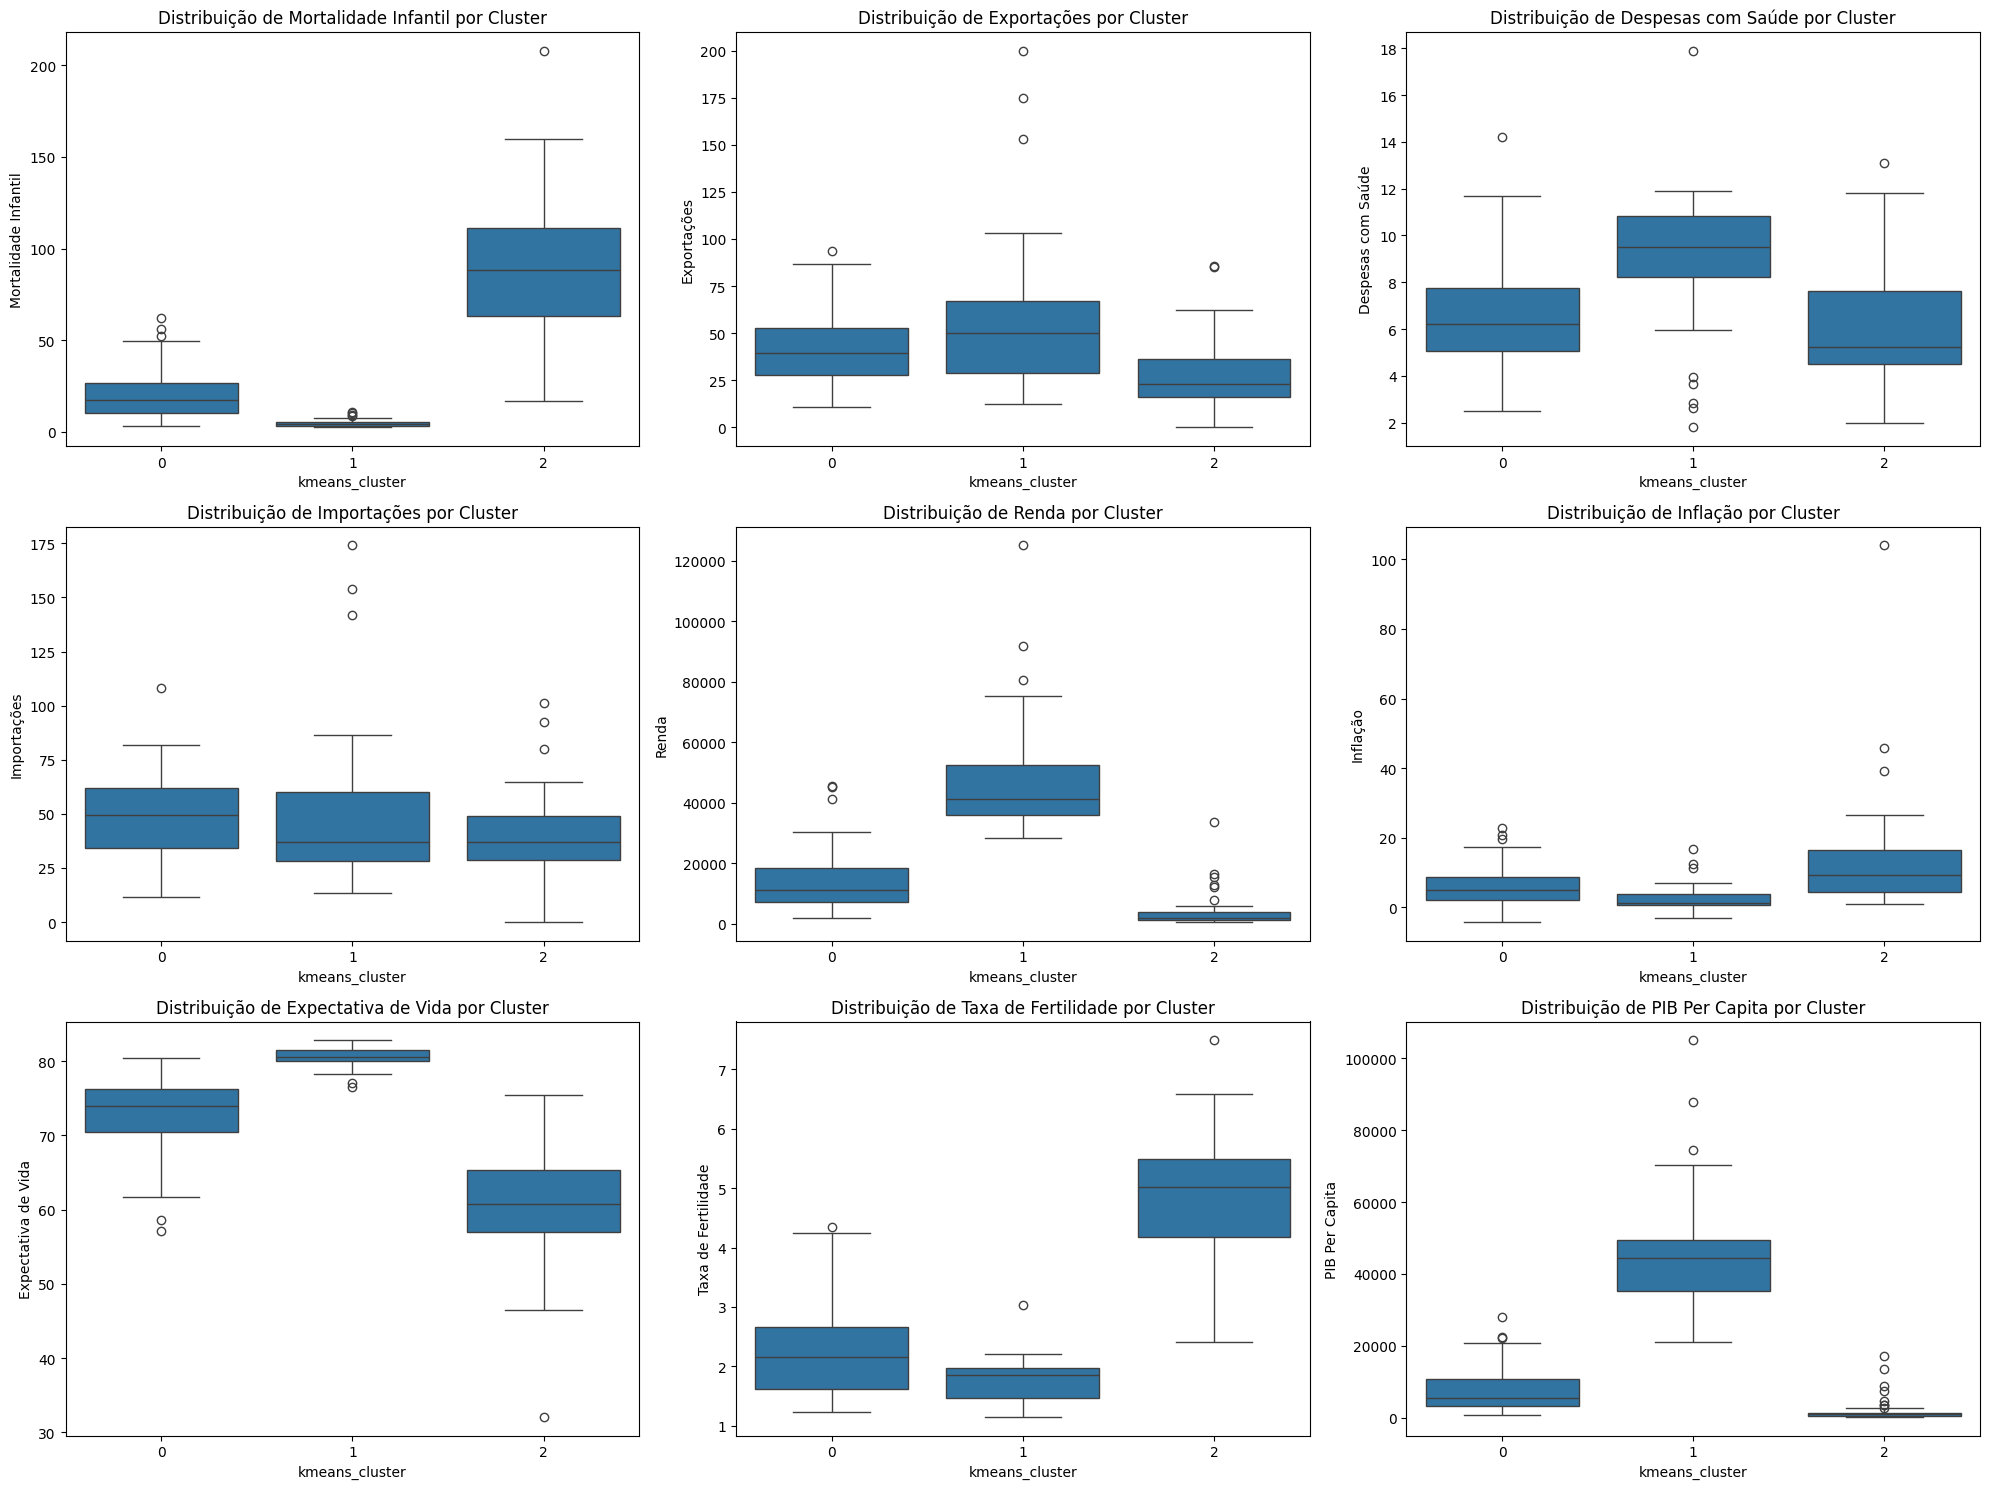

In [101]:
# Gráficos para mostrar a distribuição das variáveis nos clusters
plt.figure(figsize=(20, 15))
for i, column in enumerate(country_data.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='kmeans_cluster', y=column, data=country_data)
    plt.title(f'Distribuição de {column} por Cluster')

plt.tight_layout()
plt.show()



Agora, vou identificar o país que, segundo o algoritmo K-Médias, melhor representa cada um desses clusters. Para fazer isso, vou encontrar o país mais próximo do centróide de cada cluster.​​

Os países que melhor representam cada cluster, de acordo com o algoritmo K-Médias, são:

*   **Cluster 0**: Áustria
*   **Cluster 1**: Gana
*   **Cluster 2**: Suriname

A Áustria está no cluster com países mais desenvolvidos, o que faz sentido dado o seu alto PIB per capita e boas condições de saúde. Gana representa o cluster intermediário, e Suriname o cluster de países menos desenvolvidos.

In [102]:
import numpy as np

# Calcular a distância de cada ponto ao centróide do seu cluster
distances_to_centroid = np.min(kmeans.transform(scaled_data), axis=1)

# Encontrar o índice do ponto mais próximo ao centróide em cada cluster
closest_points_idx = []
for cluster in range(n_clusters):
    idx_in_cluster = np.where(kmeans_clusters == cluster)[0]
    closest_point_idx = idx_in_cluster[np.argmin(distances_to_centroid[idx_in_cluster])]
    closest_points_idx.append(closest_point_idx)

# Identificar os países que são os pontos mais próximos aos centróides
representative_countries = country_data.loc[closest_points_idx, ['country', 'kmeans_cluster']]
representative_countries


,country,kmeans_cluster
143,Suriname,0
8,Austria,1
59,Ghana,2


### Clusterização Hierárquica

Agora, vou prosseguir com a clusterização hierárquica e apresentar o dendograma para interpretação.​​

O dendograma da clusterização hierárquica apresenta uma visão hierárquica dos agrupamentos. A altura das linhas verticais representa a distância entre os clusters, e podemos ver que há três agrupamentos principais que se alinham bem com a escolha de 3 clusters para o K-Médias.

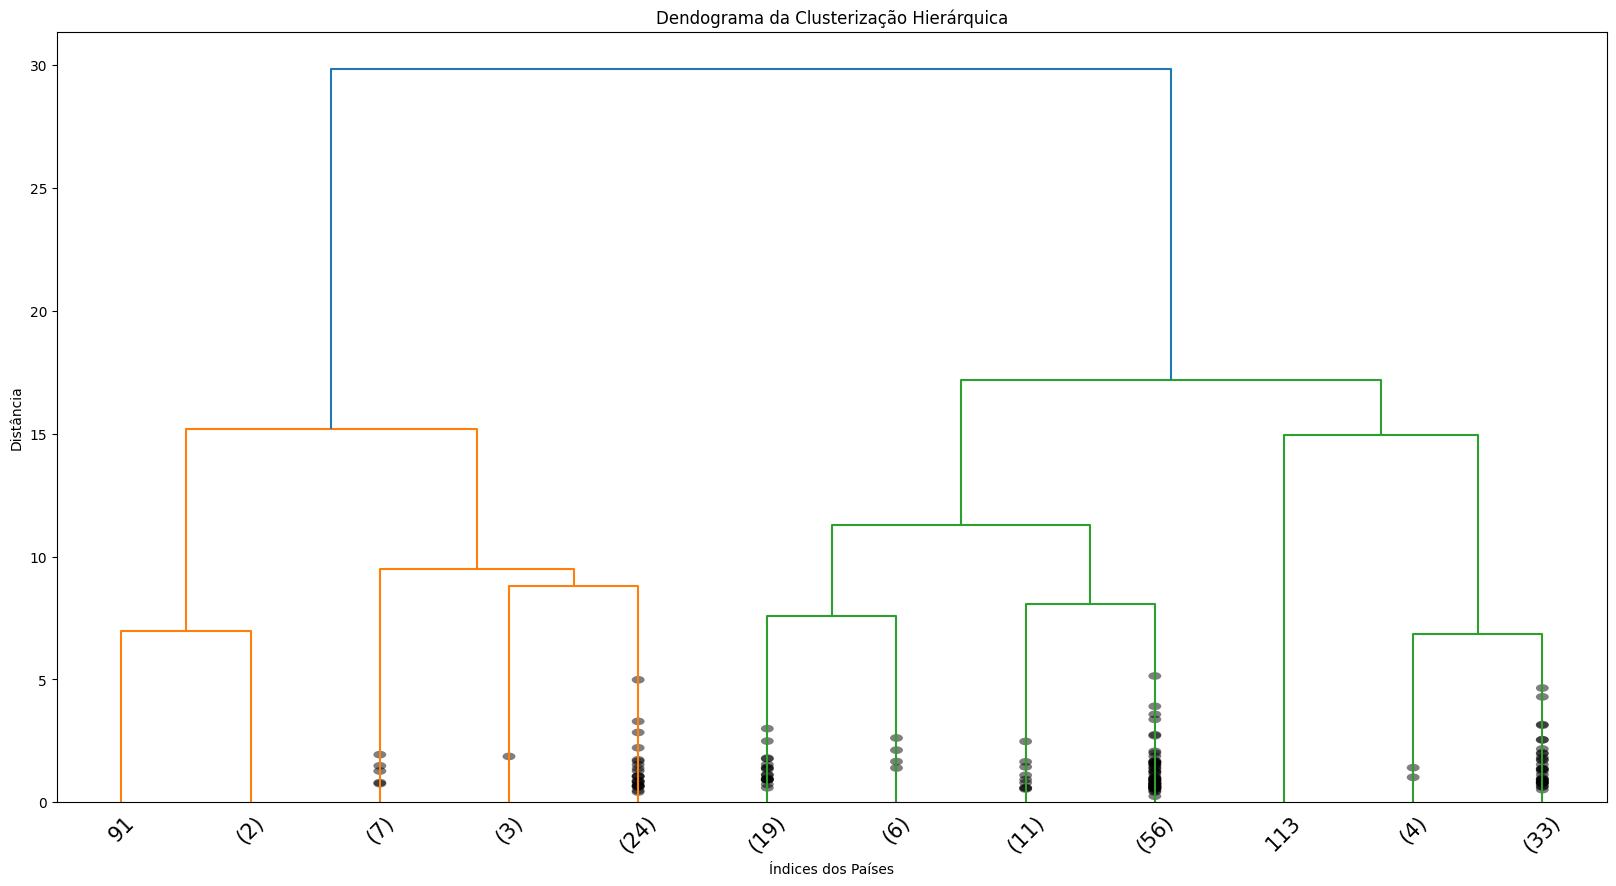

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar a clusterização hierárquica
Z = linkage(scaled_data, 'ward')

# Plotar o dendograma
plt.figure(figsize=(20, 10))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Dendograma da Clusterização Hierárquica')
plt.xlabel('Índices dos Países')
plt.ylabel('Distância')
plt.show()


### Comparação entre K-Médias e Clusterização Hierárquica

1.  **Semelhanças**: Ambos os métodos identificaram três grupos principais de países, o que está em linha com o número de clusters definidos inicialmente para o K-Médias.
    
2.  **Diferenças**: Enquanto o K-Médias fornece uma divisão mais "rígida" dos dados, a clusterização hierárquica oferece uma visão mais "flexível" que permite entender as relações hierárquicas entre os clusters.

* * *

# Escolha de Algoritmos
---------------------

### Etapas do Algoritmo de K-Médias

1.  **Escolha do Número de Clusters k:
    
    *   Decido quantos clusters quero que o algoritmo identifique.
2.  **Inicialização de Centróides**:
    
    *   Escolho k pontos aleatoriamente do conjunto de dados como centróides iniciais ou uso uma técnica como K-Means++ para uma inicialização mais eficaz.
3.  **Atribuição de Clusters**:
    
    *   Para cada ponto no conjunto de dados, calculo a distância para todos os k centróides.
    *   Atribuo o ponto ao cluster representado pelo centróide mais próximo.
4.  **Recalcular Centróides e Medóides**:
    
    *   Para cada um dos k clusters, calculo o novo centróide como sendo a média de todos os pontos atualmente no cluster.
    *   Identifico o ponto mais próximo ao centróide como o medóide do cluster.
5.  **Verificar Convergência**:
    
    *   Comparo os novos centróides com os antigos.
    *   Se os centróides permanecerem inalterados ou mudarem muito pouco, o algoritmo convergiu.
6.  **Repetição**:
    
    *   Se os centróides mudaram, retorno ao Passo 3 e repito.
7.  **Término**:
    
    *   O algoritmo termina quando os centróides não mudam significativamente entre as iterações ou após um número máximo predefinido de iterações.

### Sensibilidade a Outliers

- Pergunta: O algoritmo de K-médias é sensível a outliers nos dados. Explique.

- Resposta: O algoritmo K-Médias é sensível a outliers porque ele minimiza a soma dos quadrados das distâncias entre os pontos e seus centróides. Um outlier    distante pode distorcer significativamente a posição do centróide.

### Robustez do DBScan a Outliers

- Pergunta: Por que o algoritmo de DBScan é mais robusto à presença de outliers?

- Resposta: O algoritmo DBScan é mais robusto a outliers porque ele agrupa pontos com base na densidade. Pontos em regiões de baixa densidade são tipicamente considerados como ruído ou outliers.

* * *

# OBS: EXEMPLOS PARA FIXAÇÃO

/home/marcelo/anaconda3/envs/DataEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


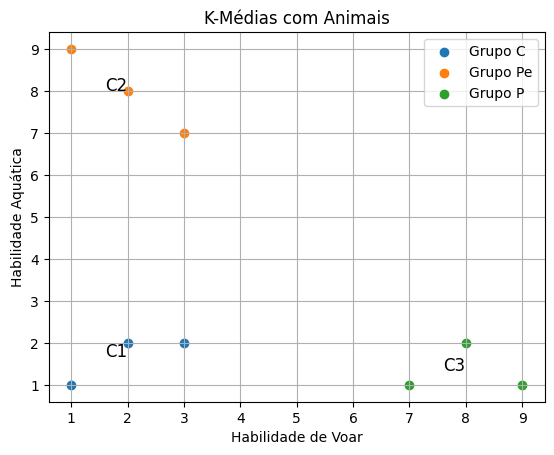

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo: habilidade de voar e habilidade aquática
# Pássaros (P), Cães (C), Peixes (Pe)
animals = np.array([[9, 1], [8, 2], [7, 1],  # Pássaros
                    [2, 2], [1, 1], [3, 2],  # Cães
                    [2, 8], [1, 9], [3, 7]]) # Peixes
animal_labels = ['P', 'P', 'P', 'C', 'C', 'C', 'Pe', 'Pe', 'Pe']

# Aplicar K-Médias
kmeans = KMeans(n_clusters=3, random_state=0).fit(animals)

# Obter os centróides e os rótulos dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotar os resultados
for i, label in enumerate(set(labels)):
    group = np.array([animals[j] for j, l in enumerate(labels) if l == label])
    group_labels = [animal_labels[j] for j, l in enumerate(labels) if l == label]
    plt.scatter(group[:, 0], group[:, 1], label=f'Grupo {group_labels[0]}')

# Marcar os centróides
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}', fontsize=12, ha='right')

plt.title('K-Médias com Animais')
plt.xlabel('Habilidade de Voar')
plt.ylabel('Habilidade Aquática')
plt.legend()
plt.grid(True)
plt.show()


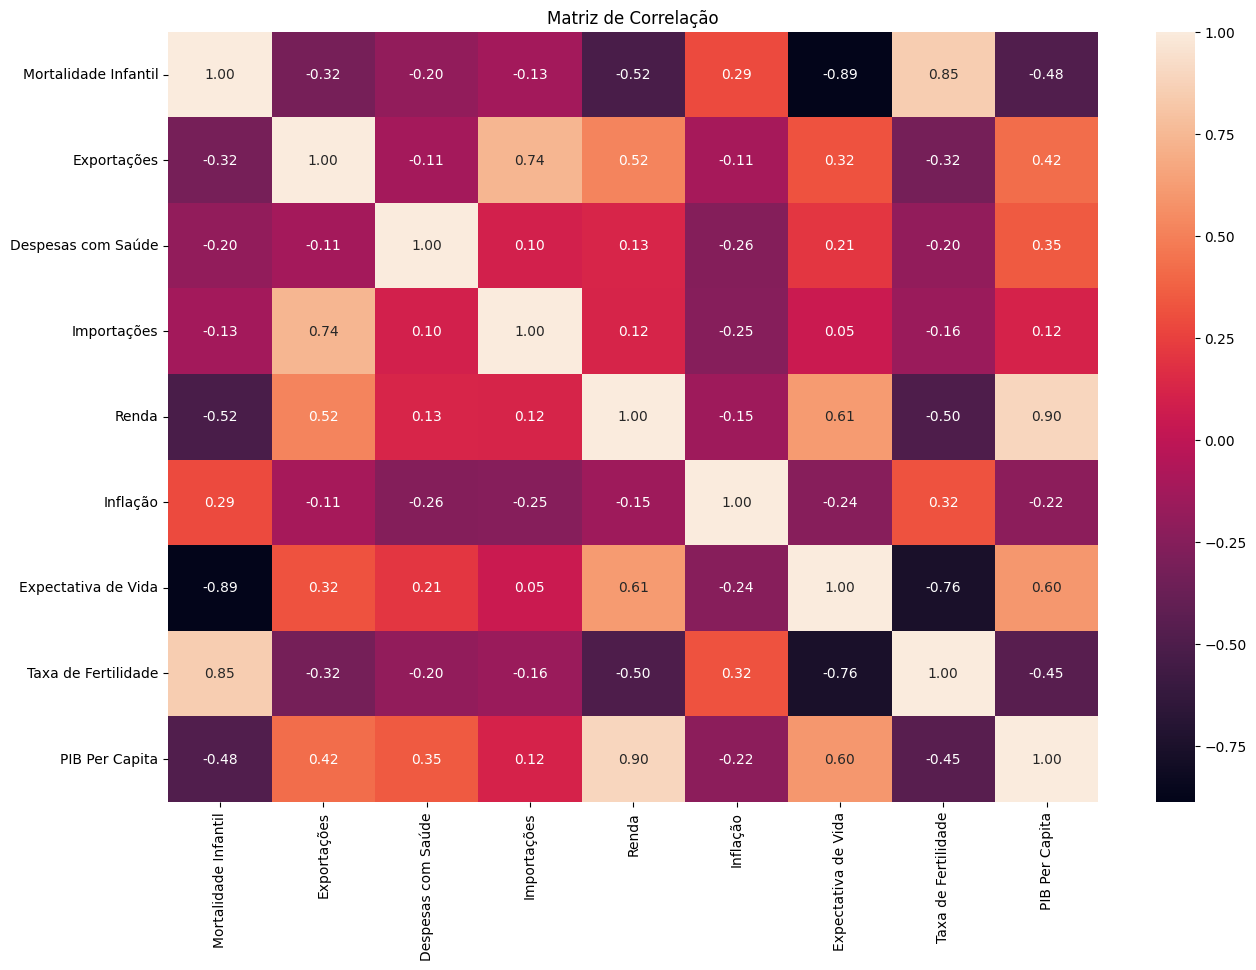

In [105]:
# Matriz de correlação excluindo a coluna 'country'

# Se existir Remover a coluna 'kmeans_cluster'
if 'kmeans_cluster' in country_data.columns:
    country_data.drop(['kmeans_cluster'], axis=1, inplace=True)


correlation_matrix = country_data.drop(['country'], axis=1).corr()
# sns.heatmap(correlation_matrix, annot=True)

# Aumentar o tamanho do gráfico para torná-lo mais legível
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

